In [105]:
# Importing the relevant packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [106]:
# Loading the dataset

mvp_data = pd.read_csv('../data/final_table.csv')

In [107]:
mvp_data.head()

,Rank,name,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,False
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8,False
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4,False
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8,False
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3,False


In [108]:
mvp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           704 non-null    object 
 1   name                           704 non-null    object 
 2   Age                            704 non-null    int64  
 3   Tm                             704 non-null    object 
 4   First                          704 non-null    float64
 5   Pts Won                        704 non-null    float64
 6   Pts Max                        704 non-null    int64  
 7   Share                          704 non-null    float64
 8   G                              704 non-null    int64  
 9   MP                             704 non-null    float64
 10  PTS                            704 non-null    float64
 11  TRB                            704 non-null    float64
 12  AST                            704 non-null    flo

In [109]:
mvp_data.columns

Index(['Rank', 'name', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'year', 'team_x', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'seed', 'slug', 'positions', 'age', 'team_y', 'games_played',
       'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player',
       'is_combined_totals'],
      dtype='object')

# EDA

In [110]:
# First step is to find a correlation matrix to see which features are the most important

corr_data = mvp_data[['Share', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'WS/48', 'W/L%', 'seed','player_efficiency_rating',
       'true_shooting_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player',
       'is_combined_totals']]

In [111]:
corr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Share                          704 non-null    float64
 1   PTS                            704 non-null    float64
 2   TRB                            704 non-null    float64
 3   AST                            704 non-null    float64
 4   STL                            704 non-null    float64
 5   BLK                            704 non-null    float64
 6   WS/48                          704 non-null    float64
 7   W/L%                           704 non-null    float64
 8   seed                           704 non-null    float64
 9   player_efficiency_rating       704 non-null    float64
 10  true_shooting_percentage       704 non-null    float64
 11  total_rebound_percentage       704 non-null    float64
 12  assist_percentage              704 non-null    flo

In [112]:
corr_matrix = corr_data.corr()
corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Share to is_combined_totals
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Share                          25 non-null     float64
 1   PTS                            25 non-null     float64
 2   TRB                            25 non-null     float64
 3   AST                            25 non-null     float64
 4   STL                            25 non-null     float64
 5   BLK                            25 non-null     float64
 6   WS/48                          25 non-null     float64
 7   W/L%                           25 non-null     float64
 8   seed                           25 non-null     float64
 9   player_efficiency_rating       25 non-null     float64
 10  true_shooting_percentage       25 non-null     float64
 11  total_rebound_percentage       25 non-null     float64
 12  assist_percentage              25 non

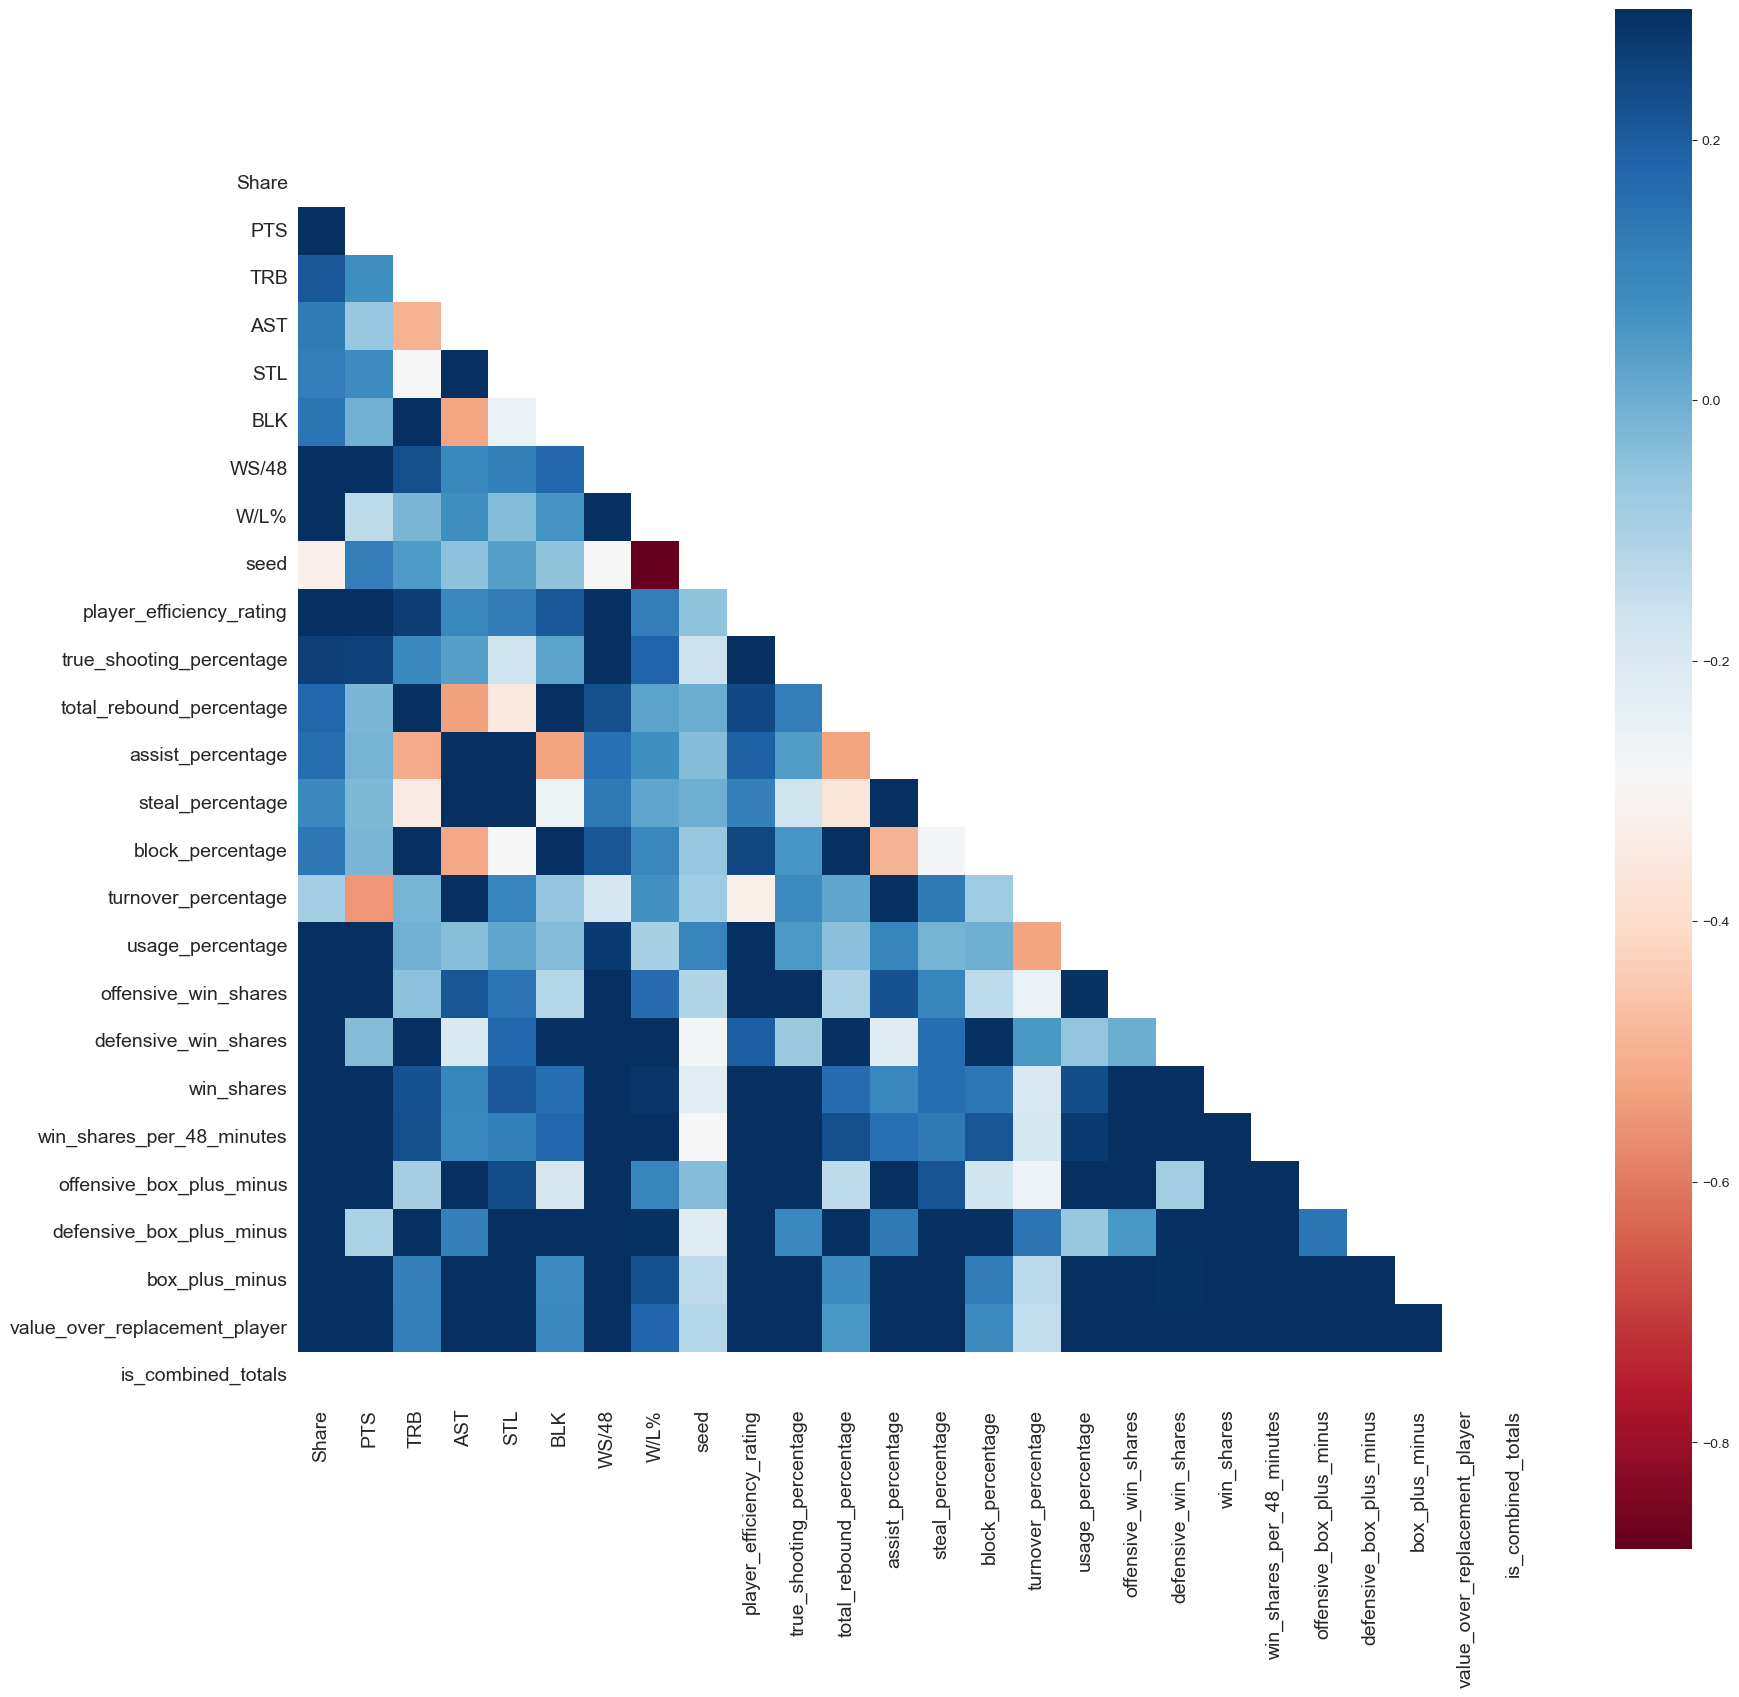

In [114]:
# Plot heat map, Reference: https://forum.freecodecamp.org/t/create-a-correlation-matrix-using-the-dataset-plot-the-correlation-matrix-using-seaborns-heatmap-mask-the-upper-triangle-the-chart-should-look-like-examples-figure-2-png/416415
corr_mask = np.zeros_like(corr_matrix)
corr_mask[np.triu_indices_from(corr_mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr_matrix, mask=corr_mask, vmax=.3, square=True, cmap="RdBu")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

   #plt.savefig("heatmap.png")

In [115]:
# Filtering the data that will be used to plot the scatter-plot

scatter_data = mvp_data[['Rank','Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'year','W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'seed', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player',
       'is_combined_totals']]

scatter_data

,Rank,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,...,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player,is_combined_totals
0,1,147.0,221,0.665,82,38.3,24.8,10.8,4.5,1.0,...,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,False
1,2,31.5,221,0.143,78,36.1,26.9,7.4,4.6,2.2,...,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8,False
2,3,19.0,221,0.086,78,37.6,33.1,5.2,2.6,1.4,...,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4,False
3,4,15.0,221,0.068,82,36.0,21.3,10.4,4.5,1.7,...,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8,False
4,5T,2.0,221,0.009,80,35.8,14.1,2.5,8.4,1.3,...,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,9,5.0,1000,0.005,56,34.7,29.4,6.1,6.3,0.9,...,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7,False
700,10,3.0,1000,0.003,64,33.4,22.9,5.9,5.3,1.8,...,25.6,9.4,2.9,12.3,0.277,6.7,2.0,8.7,5.8,False
701,11,2.0,1000,0.002,73,33.4,25.0,4.2,6.1,1.1,...,30.1,5.5,1.8,7.4,0.146,3.4,-0.9,2.5,2.7,False
702,12T,1.0,1000,0.001,68,35.0,24.0,3.5,6.2,0.9,...,27.2,6.9,1.8,8.7,0.175,4.4,-0.5,3.9,3.5,False


In [11]:
scatter_data.loc[:, 'Won/Lost'] = scatter_data['Rank'].apply(lambda x: 'Won' if x == '1' else 'Lost') # Reference: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

C:\Users\deshr\AppData\Local\Temp\ipykernel_9844\296596692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scatter_data.loc[:, 'Won/Lost'] = scatter_data['Rank'].apply(lambda x: 'Won' if x == '1' else 'Lost') # https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas


In [12]:
scatter_data.columns

Index(['Rank', 'Pts Won', 'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'year', 'W', 'L',
       'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'seed', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player', 'is_combined_totals',
       'Won/Lost'],
      dtype='object')

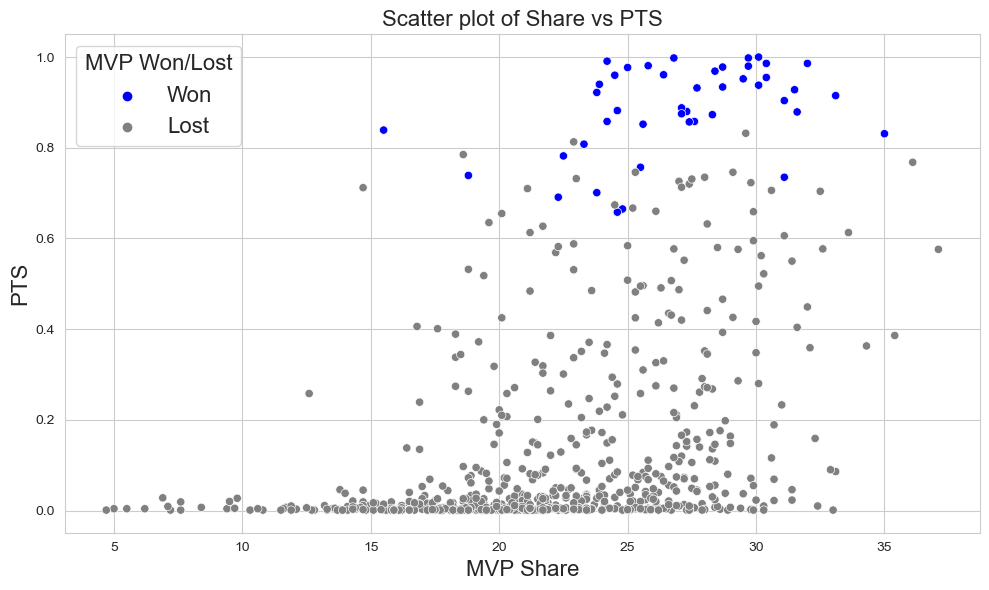

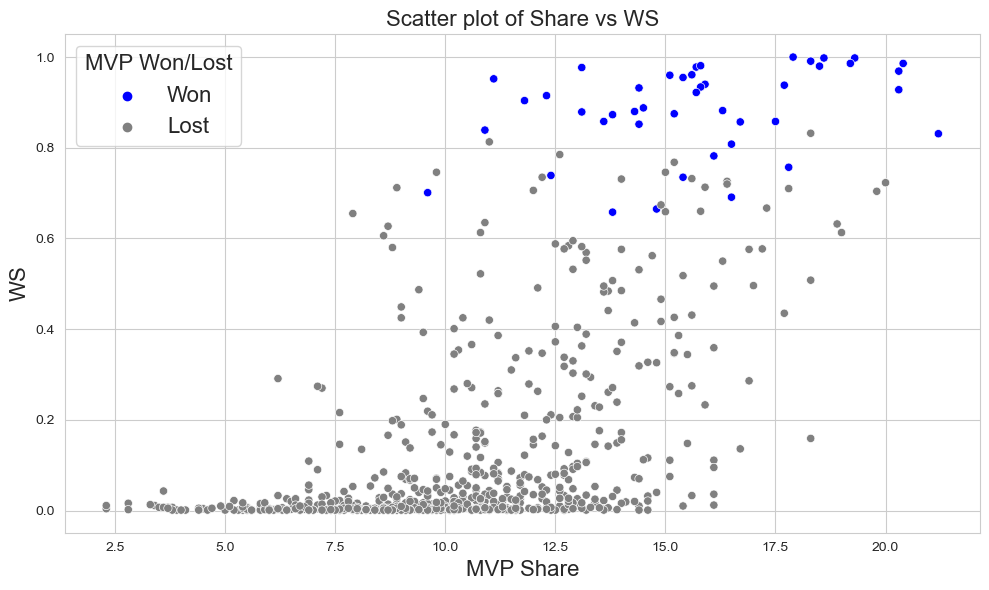

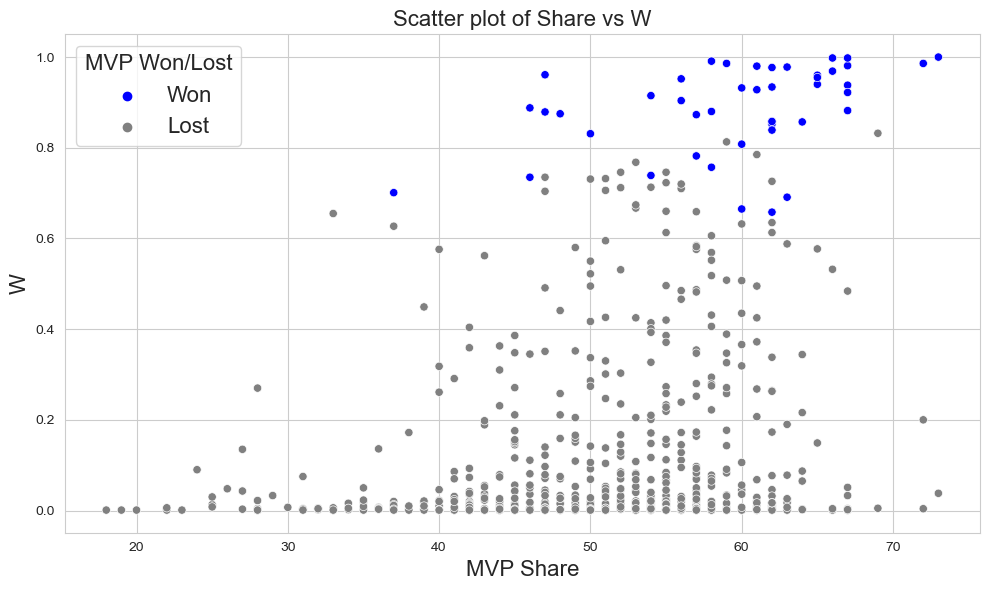

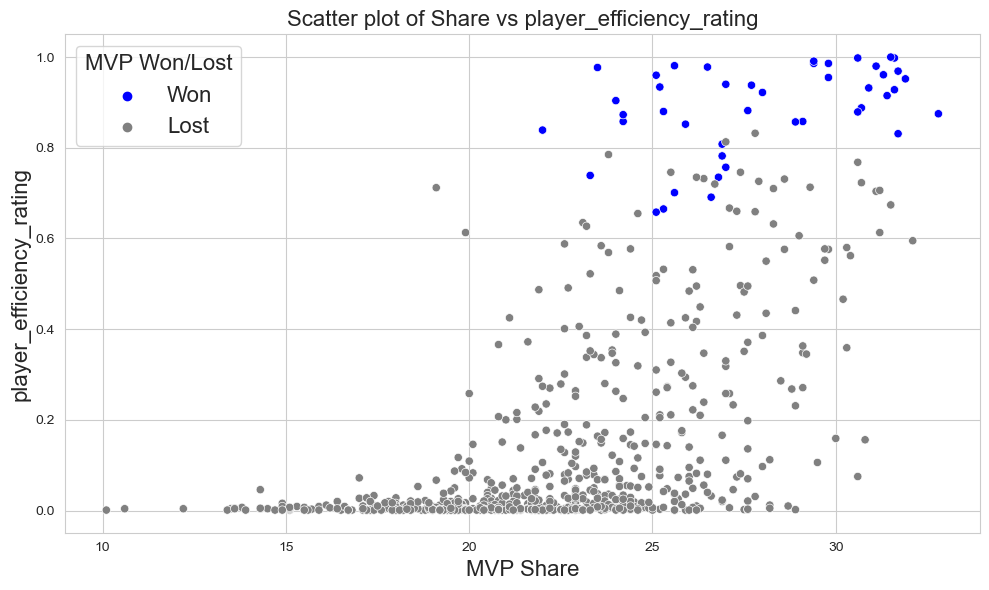

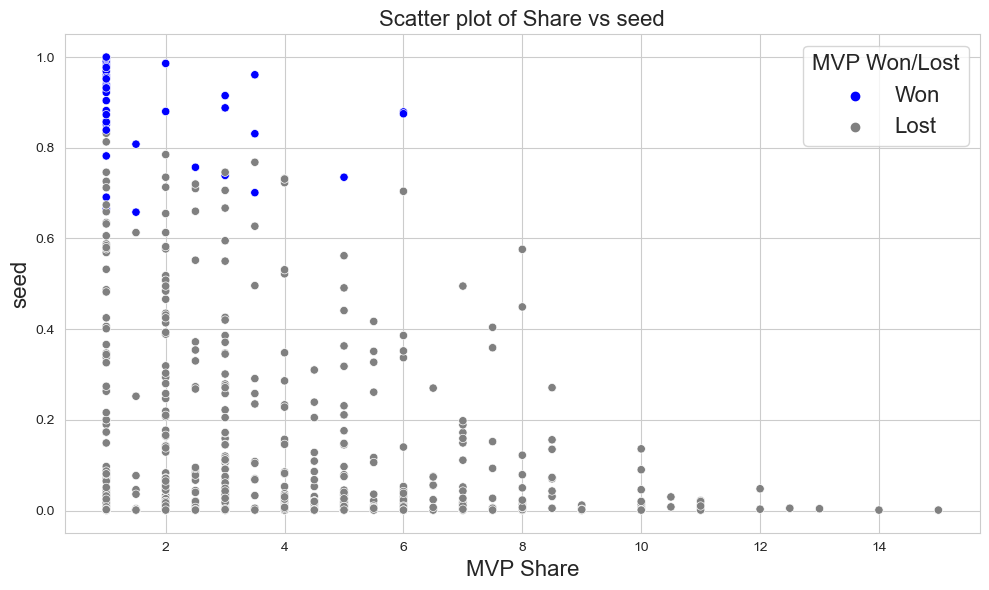

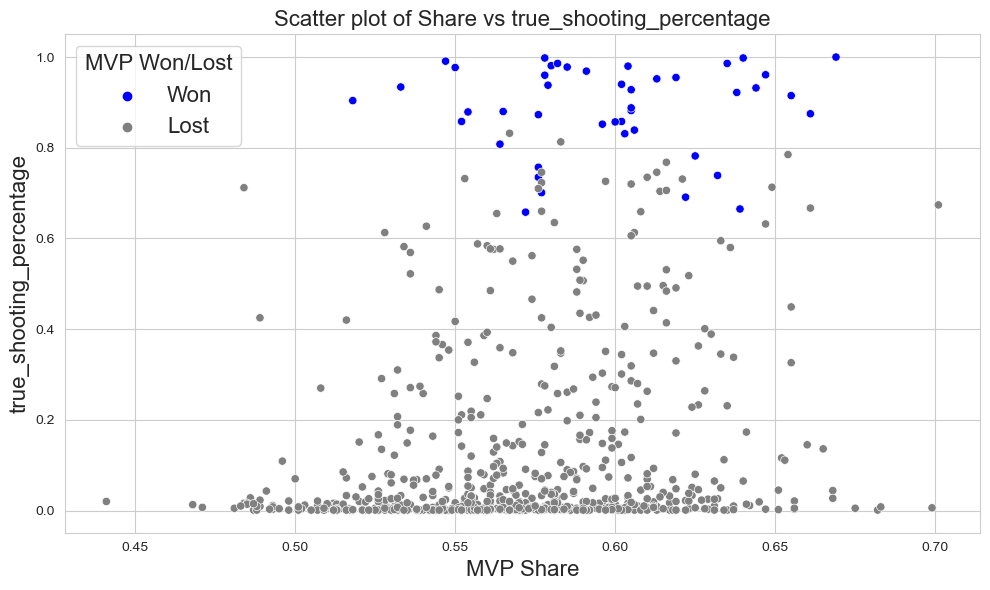

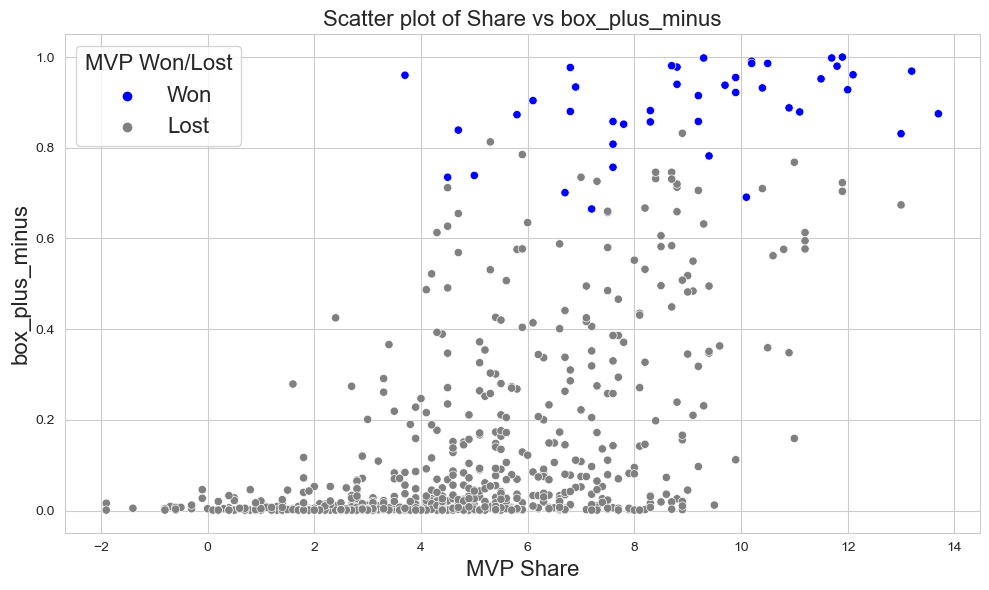

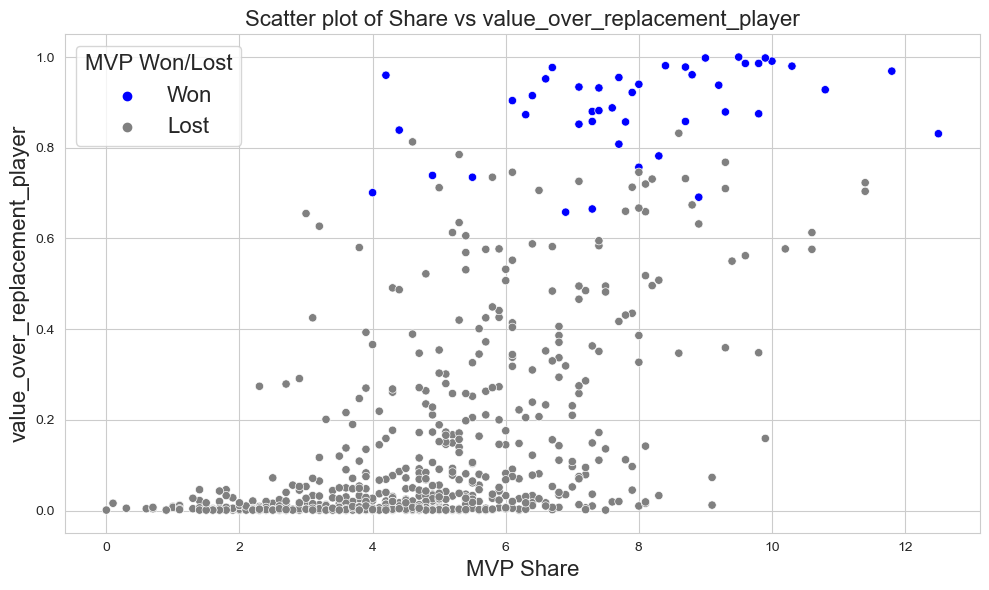

In [13]:
# Mapping out the scatter-plot for the major correlated statistics and the MVP shares

features_to_visualize = ['PTS', 'WS', 'W', 'player_efficiency_rating', 'seed', 'true_shooting_percentage','box_plus_minus','value_over_replacement_player']

sns.set_style("whitegrid")

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))  
    sns.scatterplot(data=scatter_data, 
                    x=feature, 
                    y='Share', 
                    hue='Won/Lost', 
                    palette={'Won': 'blue', 'Lost': 'grey'})
    
    plt.title(f"Scatter plot of Share vs {feature}", fontsize = 16)  
    plt.xlabel('MVP Share', fontsize = 16)     
    plt.ylabel(feature, fontsize = 16)  
    plt.legend(title='MVP Won/Lost', fontsize = 16, title_fontsize=16) 
    plt.tight_layout()  
   #plt.savefig(f"scatterplot_{feature}.png") 
    plt.show()


In [14]:
mvp_data.columns

Index(['Rank', 'name', 'Age', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Share',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS',
       'WS/48', 'year', 'team_x', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G',
       'SRS', 'seed', 'slug', 'positions', 'age', 'team_y', 'games_played',
       'minutes_played', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player',
       'is_combined_totals'],
      dtype='object')

In [15]:
mvp_data.drop(columns= ['First', 'team_x', 'slug', 'positions', 'age', 'team_y', 'games_played',
       'minutes_played', 'win_shares', 'win_shares_per_48_minutes','is_combined_totals'], inplace=True)

In [16]:
predictors = ['G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'W', 'L', 'W/L%','seed',
       'player_efficiency_rating', 'true_shooting_percentage', 'box_plus_minus', 'value_over_replacement_player']

In [17]:
# Splitting the dataset into train and validation sets

test = mvp_data[mvp_data['year'] == 2023]
train = mvp_data[mvp_data['year'] != 2023]

In [76]:
rf = RandomForestRegressor(random_state=12)

param_grid = {
    'n_estimators': [50,100,150,200,500],
    'max_depth': [None, 10, 20,30,50],
    'min_samples_split': [2, 5, 10,20,50],
    'min_samples_leaf': [1, 2, 4,8,10]
              }

In [77]:
# Performing grid search cross validation to find the best hyperparameters for the random forest model

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [78]:
# FItting the model onto the training dataset

grid_search.fit(train[predictors], train['Share'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 4, 8, 10],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [50, 100, 150, 200, 500]},
             scoring='neg_mean_squared_error')

In [79]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [80]:
best_estimator = grid_search.best_estimator_

best_estimator

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=500,
                      random_state=12)

In [81]:
# Predicting the shares for the validation set

y_pred = best_estimator.predict(test[predictors])
y_pred = pd.DataFrame(y_pred, columns = ['Predictions'], index = test.index)

In [82]:
# Calculating the R2 score

r2 = r2_score(test['Share'], y_pred)
print("R2 Score:", r2)

R2 Score: 0.7014910346440113


In [83]:
# Calculating the Mean Squared Error

mse = mean_squared_error(test['Share'], y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.028037385684376928


In [84]:
test_prediction = pd.concat([mvp_data[['year', 'name', 'Share']], y_pred], axis=1)
test_prediction = test_prediction.dropna().reset_index().drop(columns = "index", axis = 1)
test_prediction

,year,name,Share,Predictions
0,2023,Joel Embiid,0.915,0.505355
1,2023,Nikola Jokić,0.674,0.754771
2,2023,Giannis Antetokounmpo,0.606,0.437013
3,2023,Jayson Tatum,0.280,0.185449
4,2023,Shai Gilgeous-Alexander,0.046,0.170921
5,2023,Donovan Mitchell,0.030,0.078572
6,2023,Domantas Sabonis,0.027,0.161981
7,2023,Luka Dončić,0.010,0.293041
8,2023,Stephen Curry,0.005,0.059039
9,2023,Jimmy Butler,0.003,0.173531


In [85]:
# Using linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train[predictors], train['Share'])

y_pred_lr = lr.predict(test[predictors])

r2 = r2_score(test['Share'], y_pred_lr)
mse = mean_squared_error(test['Share'], y_pred_lr)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.578497880303984
Mean Squared Error: 0.039589489322728384


# Predicting the 2024 MVP

In [116]:
# Loading the 2024 nba data and copying it

data_2024 = pd.read_csv('../data/player_2024_data.csv')
data_2024_copy = data_2024

In [87]:
data_2024.columns

Index(['name', 'positions_x', 'age_x', 'games_played_x', 'games_started',
       'minutes_played_x', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'FT%',
       'slug_y', 'positions_y', 'age_y', 'games_played_y', 'minutes_played_y',
       'player_efficiency_rating', 'true_shooting_percentage',
       'three_point_attempt_rate', 'free_throw_attempt_rate',
       'offensive_rebound_percentage', 'defensive_rebound_percentage',
       'total_rebound_percentage', 'assist_percentage', 'steal_percentage',
       'block_percentage', 'turnover_percentage', 'usage_percentage',
       'offensive_win_shares', 'defensive_win_shares', 'w

In [88]:
data_2024.drop(columns = ['positions_x', 'age_x', 'games_started', 'made_field_goals', 'attempted_field_goals',
       'made_three_point_field_goals', 'attempted_three_point_field_goals',
       'made_free_throws', 'attempted_free_throws', 'offensive_rebounds',
       'defensive_rebounds', 'assists', 'steals', 'blocks', 'turnovers',
       'personal_fouls', 'points', 'slug_y', 'positions_y',
       'age_y', 'games_played_y', 'minutes_played_y', 'team_names', 'year'], inplace = True)

In [89]:
data_2024.columns

Index(['name', 'games_played_x', 'minutes_played_x', 'FGM', 'FGA', '3PM',
       '3PA', 'FTM', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'FG%', '3P%', 'FT%', 'player_efficiency_rating',
       'true_shooting_percentage', 'three_point_attempt_rate',
       'free_throw_attempt_rate', 'offensive_rebound_percentage',
       'defensive_rebound_percentage', 'total_rebound_percentage',
       'assist_percentage', 'steal_percentage', 'block_percentage',
       'turnover_percentage', 'usage_percentage', 'offensive_win_shares',
       'defensive_win_shares', 'win_shares', 'win_shares_per_48_minutes',
       'offensive_box_plus_minus', 'defensive_box_plus_minus',
       'box_plus_minus', 'value_over_replacement_player', 'is_combined_totals',
       'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'seed'],
      dtype='object')

In [91]:
data_2024 = data_2024.rename(columns= {
    'games_played_x': 'G',
    'minutes_played_x': 'MP',
    'win_shares': 'WS',
    'win_shares_per_48_minutes':'WS/48', 
})

In [92]:
# Dropping the duplicate values from the dataset

data_2024.drop_duplicates(subset = ['name'], inplace = True) 

In [93]:
#Filtering the dataset for players that have played more than 65 games in the season. Source: https://theathletic.com/5244514/2024/02/28/nba-65-game-rule-awards-mvp/

data_2024 = data_2024[data_2024['G'] >= 65]

In [94]:
# Filling the null vales with 0

data_2024['3P%'] = data_2024['3P%'].fillna(0)

In [95]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 2 to 656
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           165 non-null    object 
 1   G                              165 non-null    int64  
 2   MP                             165 non-null    int64  
 3   FGM                            165 non-null    float64
 4   FGA                            165 non-null    float64
 5   3PM                            165 non-null    float64
 6   3PA                            165 non-null    float64
 7   FTM                            165 non-null    float64
 8   FTA                            165 non-null    float64
 9   TRB                            165 non-null    float64
 10  AST                            165 non-null    float64
 11  STL                            165 non-null    float64
 12  BLK                            165 non-null    float64


In [96]:
# Predicting the MVP shares for the 2024 NBA season

prediction_2024 = best_estimator.predict(data_2024[predictors])
prediction_2024 = pd.DataFrame(prediction_2024, columns = ['Prediction'], index = data_2024.index)

In [117]:
#Concatenating the predictions with the players' name 


combination = pd.concat([data_2024_copy[["name"]], prediction_2024], axis=1)

In [118]:
mvp_top10 = combination.sort_values(by = 'Prediction', ascending = False).head(10)

In [119]:
mvp_top10['Rank'] = mvp_top10['Prediction'].rank(ascending=False)

In [120]:
mvp_top10['Rank'] = mvp_top10['Rank'].astype(int)

In [121]:
mvp_top10 = mvp_top10.reset_index(drop = True)

In [122]:
mvp_top10 = mvp_top10.rename(columns = {'Prediction': 'Predicted MVP Shares', 'year': 'Year', 'name': 'Name'})

In [123]:
mvp_top10

,Name,Predicted MVP Shares,Rank
0,Nikola Jokić,0.847522,1
1,Shai Gilgeous-Alexander,0.543104,2
2,Giannis Antetokounmpo,0.463126,3
3,Luka Dončić,0.432216,4
4,Jayson Tatum,0.226881,5
5,Jalen Brunson,0.176772,6
6,Domantas Sabonis,0.142737,7
7,Anthony Davis,0.132711,8
8,Tyrese Haliburton,0.109140,9
9,LeBron James,0.104890,10


In [104]:
# Saving the MVP candidates for the 2024 season to the data folder.

data_folder = '../data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)


predicted_mvp_csv_path = os.path.join(data_folder, 'Predicted MVP 2024.csv')
mvp_top10.to_csv(predicted_mvp_csv_path, index = False)